# Boltzmann Lattice (Fluid flow)

## Simulation setup & execution

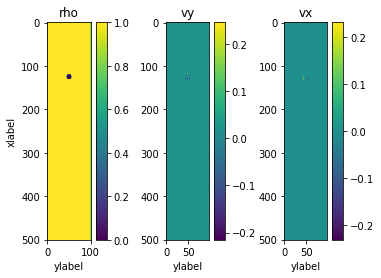

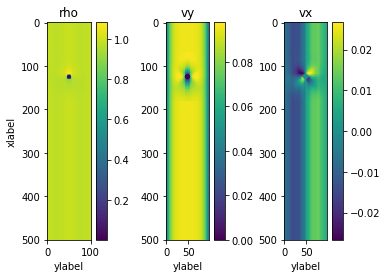

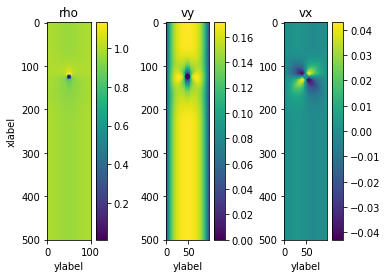

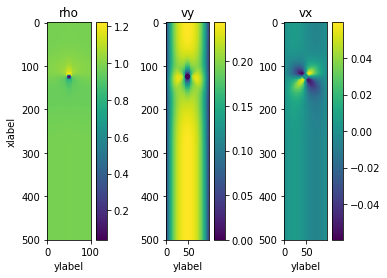

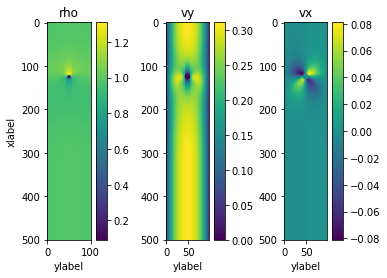

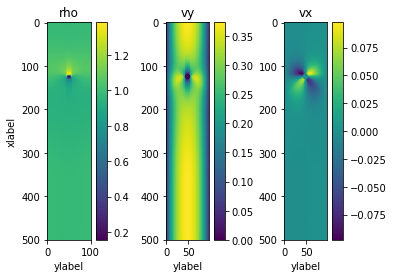

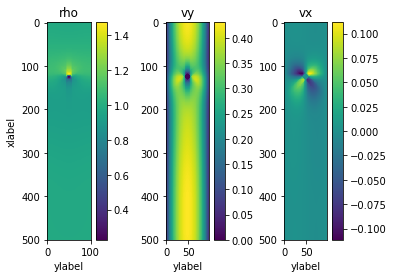

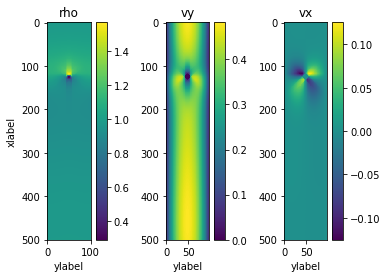

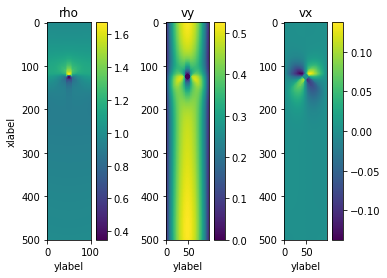

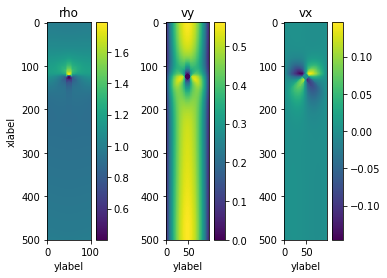

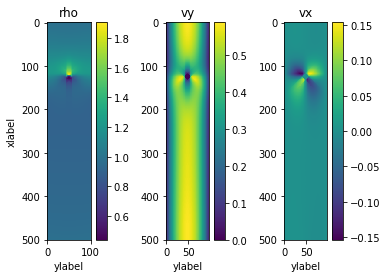

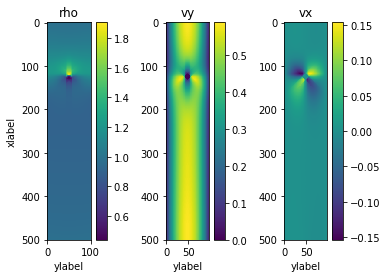

Maximum number of iterations (500) have been reached. It is adviced to increase the maximum number of iterations or increase the error tolerance (epsilon).
Total run time = 29.332425594329834


In [1]:
import time as tm
from types import SimpleNamespace
from Boltzmann_simulation import *
from constants import *

start_time = tm.time()

# Create name space
sim = SimpleNamespace()

# Assign system dimensions/parameters
sim.L, sim.W = 500, 100
sim.m = 1
sim.P = 1
sim.epsilon = 0#0.001
sim.max_iterations = 500
sim.plot_iteration = 50
sim.nu = 2
sim.dv = 0.01

# Square obstruction
sim.obs = 'cylinder' # obstruction type (square, cylinder) or 'False' 
sim.L_ratio = 1/30  # Length of the object wrt length of the system
sim.W_ratio = 1/10 # Width of the object wrt length of the system

#Load constants
sim = constants(sim)

# Actual simulation
par = boltzmann_sim(sim)

#Reynolds_pipe, Reynolds_obs = Reynolds(sim, par)
    
end_time = tm.time()
total_time = end_time - start_time
print('Total run time =', total_time)

In [2]:
par.R

50

In [ ]:
# Theoretical values (60*20, nu = 2, dv = 0.01)
data_slice = par.u[0,1:sim.W_in,0]
plt.plot(data_slice, label = 'Simulation')

x = np.linspace(0, len(data_slice) - 1, len(data_slice))
y = -sim.dv/(2*sim.nu)*(x-(len(data_slice) - 1)/2)**2 
y = y - min(y)
#plt.plot(x, y, '--', label = 'Theoretical')
plt.xlabel('x')
plt.ylabel('v_y')
plt.legend()
plt.show()

In [ ]:
plt.plot(par.v_tot[0:300])
plt.show()

In [ ]:
np.mean(np.abs(par.u-par.vxy))

# To Do

- Implement intial densities  (now just set to 0), make sure that upper and lower boundary are set to 0.
- Implement pressure gradient (hence for in x direction) (In forcing function)
- Namespace for results (needed for data processing)
- Add movie (-> under construction)

In [25]:
R = int(1/4*min(sim.L,sim.W))
cx, cy = int(sim.L/2), int(sim.W/2)

X,Y = np.meshgrid(np.linspace(0, sim.L, sim.L_n), np.linspace(0, sim.W, sim.W_n))
grid = np.stack((X,Y), axis = -1)
grid[:,:,0] -= cx
grid[:,:,1] -= cy

cylinder = grid[:,:,0]**2 + grid[:,:,1]**2 <= R**2


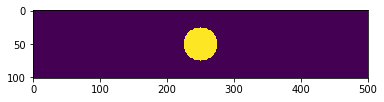

In [26]:
plt.imshow(cylinder)
plt.show()

In [21]:
R**2

625

In [24]:
grid[:,:,0], grid[:,:,1]

(array([[-250., -249., -248., ...,  248.,  249.,  250.],
        [-250., -249., -248., ...,  248.,  249.,  250.],
        [-250., -249., -248., ...,  248.,  249.,  250.],
        ..., 
        [-250., -249., -248., ...,  248.,  249.,  250.],
        [-250., -249., -248., ...,  248.,  249.,  250.],
        [-250., -249., -248., ...,  248.,  249.,  250.]]),
 array([[-50., -50., -50., ..., -50., -50., -50.],
        [-49., -49., -49., ..., -49., -49., -49.],
        [-48., -48., -48., ..., -48., -48., -48.],
        ..., 
        [ 48.,  48.,  48., ...,  48.,  48.,  48.],
        [ 49.,  49.,  49., ...,  49.,  49.,  49.],
        [ 50.,  50.,  50., ...,  50.,  50.,  50.]]))

In [63]:
np.shape(X)

(101, 501)

In [64]:
grid = np.stack((X,Y), axis = -1)

In [65]:
np.shape(grid)

(101, 501, 2)

In [16]:
np.shape(obj)

(2, 10, 10)

In [25]:
np.shape(objX)

(10, 10)

In [22]:
np.shape(np.stack(obj, axis=-1))

(10, 10, 2)

In [28]:
(objX-cx)**2 + (objY-cy)**2 <= R**2

array([[False, False, False, False, False,  True, False, False, False,
        False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
        False]], dtype=bool)

In [33]:
X,Y = np.meshgrid(np.arange(sim.L), np.arange(sim.W))

In [35]:
np.shape(grid)


(100, 500, 2)

In [34]:
grid = np.stack((X,Y), axis=-1)

In [36]:
objX_T = objX[(objX-cx)**2 + (objY-cy)**2 <= R**2]

In [38]:
objX_T

array([250, 247, 248, 249, 250, 251, 252, 253, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 246, 247, 248, 249, 250, 251, 252, 253, 254, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 247, 248, 249, 250, 251, 252, 253])

In [39]:
objY_T = objY[(objX-cx)**2 + (objY-cy)**2 <= R**2]

In [40]:
np.shape(objX_T)

(79,)

In [41]:
np.shape(objY_T)

(79,)

In [49]:
np.shape(np.stack((objX_T,objY_T), axis = 2))

AxisError: axis 2 is out of bounds for array of dimension 2

In [56]:
par.n(objX_T,objY_T,1)

TypeError: 'numpy.ndarray' object is not callable

In [53]:
np.ndarray.tolist(objX_T)

[250,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 247,
 248,
 249,
 250,
 251,
 252,
 253]

In [71]:
G = []
if G:
    print('Ja')

In [2]:
np.shape(par.n)

(501, 101, 9)

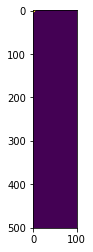

In [4]:
plt.imshow(par.indices)
plt.show()

In [2]:
min(sim.L,sim.W)

100